<a href="https://colab.research.google.com/github/AnnmariyaFrancis/ICT-Assignments/blob/main/handwriting_text_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Automate extraction of handwritten text from an image**



---



---


**Name Of The Student		:**	Ann Mariya Francis

**Internship Project Title		:** Automate extraction of handwritten text from an image

**Name of the Company	:** TCS iON

**Name of the Industry Mentor	:** Debashis Roy

**Name of the Institute		:** ICT Academy of Kerala


---



---




## **Introduction**
The objective of this project is to develop machine learning algorithms for extracting entities and knowledge from documents containing handwritten annotations. The main goal is to identify handwritten words within images. To tackle the challenge of recognizing sequences, we will employ recurrent neural networks (RNNs), which are well-suited for this task. Additionally, convolutional neural networks (CNNs) will be utilized for their prowess in image-related tasks. In the context of Optical Character Recognition (OCR) problems like the one we're addressing, it is crucial to combine both CNN and RNN approaches. This hybrid model will capitalize on the strengths of both networks, enabling us to effectively address the complexities of identifying handwritten words in images.

The implementation of the CRNN network can be divided into the following steps:

1.   Selecting Dataset
2.   Preprocessing Data
3.   Splitting of Data
3.   Creating Neural Network Architecture and Loss Function
6.   Training the Model
7.   Testing and Prediction
8.   Plot Accuracy and Loss.
9.   Get Best Model Index
10.   Save the Model.

## **Creating Dataset**
I downloaded the words.tgz from the [IAM handwritten datset](https://fki.tic.heia-fr.ch/databases/download-the-iam-handwriting-database). I've acquired the "words.tgz" file from the IAM handwritten dataset, a substantial collection comprising 115,320 images totaling 1.09 GB in size. Additionally, I've obtained the "ascii.tgz" section of the dataset, which includes the "words.txt" file containing word-related information. Both the "words.tgz" archive and the "words.txt" file have been successfully uploaded to my Google Drive. From the data provided in the "ascii" section, I've chosen to utilize a subset of 7,850 images for the training dataset, with an additional 876 images earmarked for the validation dataset.

1.   Install Kaggle.
2.   Create token.
3.   Create Folder.
4.   Get API link and download dataset.
5.   Unzip the File.

## **Dataset**
we used IAM handwritten datset. This is good dataset total of 1.09 GB images. Here I have used only 7850 images for the training set and 876 images for validation dataset.






**Extracted words.tgz and read all available images to a list**

In [ ]:
'''from google.colab import drive
drive.mount('/content/drive')

!mkdir words_temp
!mkdir words
!mkdir words_test
!cp "/content/drive/MyDrive/TCSion RIO/Handwritten text extraction/words.tgz" "words.tgz"
!cp "/content/drive/MyDrive/TCSion RIO/Handwritten text extraction/words.txt" "words.txt"

!tar -xzf words.tgz -C words_temp

import os
import shutil

image_file_list = []
for root, directories, files in os.walk('words_temp'):
    for filename in files:
        file_path = os.path.join(root, filename)
        image_file_list.append(file_path)'''

**Read the contents of words.txt and appended all the valid images to a list**

In [ ]:
'''with open('words.txt') as f:
    contents = f.readlines()
f.close()

def clean(text):
    temp = text.rstrip("\n").split(' ')
    return temp[0] + ' ' + " ".join(temp[8:])

valid_file_list = [clean(f).split(' ')[0] for f in contents[18:] if f.split(' ')[1] == 'ok']'''

**Random sampled 90000 images as main dataset and the remaining 6456 images as testing dataset and uploaded both to my gdrive as a zip files**

In [ ]:
'''import random

sample_size = 90000  # Adjust this to the number of items you want to sample

sampled_valid_files = random.sample(valid_file_list, sample_size)
main_files = [item for item in image_file_list if item.rstrip('.png').split('/')[-1] in sampled_valid_files]
test_files = [item for item in image_file_list if (item.rstrip('.png').split('/')[-1] in valid_file_list and not in sampled_valid_files)]

for file_ in main_files:
    dest = file_.split('/')[-1]
    shutil.copy(file_, 'words/')

for file_ in test_files:
    dest = file_.split('/')[-1]
    shutil.copy(file_, 'words_test/')

!zip -r 'words.zip' words
!zip -r 'words_test.zip' words_test
!cp "words.zip" "/content/drive/MyDrive/TCSion RIO/Handwritten text extraction/words.zip
!cp "words_test.zip" "/content/drive/MyDrive/TCSion RIO/Handwritten text extraction/words_test.zip"'''

**Loading and Extracting the datasets and words.txt from google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!cp "/content/drive/MyDrive/TCSion RIO/Handwritten text extraction/words.zip" "words.zip"
!cp "/content/drive/MyDrive/TCSion RIO/Handwritten text extraction/words_test.zip" "words_test.zip"
!cp "/content/drive/MyDrive/TCSion RIO/Handwritten text extraction/words.txt" "words.txt"
!unzip 'words.zip'
!unzip 'words_test.zip'

In [ ]:
import numpy as np
import cv2
import os
import random
import json

**Preprocessing**


In [ ]:
#reading all contents from words.txt that contains the filename and other information about each image
with open('words.txt') as f:
    contents = f.readlines()
f.close()

# function to return only the filename and label seperated by a space from each line
def clean(text):
    temp = text.rstrip("\n").split(' ')
    return temp[0] + ' ' + " ".join(temp[8:])

# reading filenames from the folders in the unzipped zipfile
img_files_main = [f.split('.png')[0] for f in os.listdir('words')]
img_files_test = [f.split('.png')[0] for f in os.listdir('words_test')]

# making a list of filename <space> word for all images labelled as ok
all_valid_images = [clean(f) for f in contents[18:] if f.split(' ')[1] == 'ok']

# seperating them to main and testing data based on the images folder
valid_images_main = [item for item in all_valid_images if item.split(' ')[0] in img_files_main]
valid_images_test = [item for item in all_valid_images if item.split(' ')[0] in img_files_test]

In [ ]:
print("5 samples from main dataset :", valid_images_main[:5])
print("5 samples from testing dataset :", valid_images_test[:5])

5 samples from main dataset : ['a01-000u-00-00 A', 'a01-000u-00-01 MOVE', 'a01-000u-00-02 to', 'a01-000u-00-03 stop', 'a01-000u-00-04 Mr.']
5 samples from testing dataset : ['a01-000u-01-03 Labour', 'a01-000x-02-00 meeting', 'a01-000x-02-07 Michael', 'a01-000x-04-08 Will', 'a01-003-03-06 Labour']


In [ ]:
print(f"Size of training + validation dataset : {len(valid_images_main)} images")
print(f"Size of testing dataset : {len(valid_images_test)} images")

Size of training + validation dataset : 90000 images
Size of testing dataset : 6456 images


**Making a character list of all possible characters from every word excluding blank space**

In [ ]:
words = [' '.join(itm.split(' ')[1:]) for itm in all_valid_images]

char_set = set()
for word in words:
    for char in word:
        char_set.add(char)

char_set.remove(' ')
char_list = sorted(list(char_set))

print("Total number of unique characters:", len(char_list))

Total number of unique characters: 78


In [ ]:
# function to encode each output word into digits
def encode_to_labels(text):
    encoded = []
    for char in text:
        encoded.append(char_list.index(char))
    return encoded

# for example
print("The word 'Train' encodes to:", encode_to_labels("Train"))

The word 'Train' encodes to: [45, 69, 52, 60, 65]


In [ ]:

# Function to converts image to shape (32, 128, 1) & normalize it
def process_image(img):
    """
    Converts image to shape (32, 128, 1) & normalize
    """
    w, h = img.shape

    # Aspect Ratio Calculation
    new_w = 32
    new_h = int(h * (new_w / w))
    img = cv2.resize(img, (new_h, new_w))
    w, h = img.shape

    img = img.astype('float32')

    # Converts each to (32, 128, 1)
    if w < 32:
        add_zeros = np.full((32-w, h), 255)
        img = np.concatenate((img, add_zeros))
        w, h = img.shape

    if h < 128:
        add_zeros = np.full((w, 128-h), 255)
        img = np.concatenate((img, add_zeros), axis=1)
        w, h = img.shape

    if h > 128 or w > 32:
        dim = (128,32)
        img = cv2.resize(img, dim)

    img = cv2.subtract(255, img)

    img = np.expand_dims(img, axis=2)

    # Normalize
    img = img / 255

    return img


In [ ]:
max_label_len = 0
all_images = []
all_labels = []
all_input_length = []
label_length = []
original_text = []

max_length = 0

for line in file_list:
    splits = line.split(' ')
    file_name = splits[0]
    word = ' '.join(splits[1:])
    img = cv2.imread('words/{}.png'.format(file_name), cv2.IMREAD_GRAYSCALE)
    #print(img)
    try:
        img = process_image(img)
        label = encode_to_labels(word)
        #print(label)
    except:
        print(f"[{word}]")
        continue
    all_images.append(img)
    all_labels.append(label)
    all_input_length.append(31)
    label_length.append(len(word))
    original_text.append(word)

    if len(word) > max_label_len:
        max_label_len = len(word)

[M Ps]
[M Ps]
[M Ps]
[0M Ps]
[more]
[M Ps]
[M Ps]
[T V]
[Powell]
[T V]
[B B C]
[B B C]
[B B C]
[I T V]
[B B C's]
[M Ps]
[M Ps]
[M P]
[0M P]
[M Ps]
[C O]
[T V]
[0M Ps]
[M Ps]
[n log n]


**Splitting of Data**

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
padded_labels = pad_sequences(all_labels, maxlen=max_label_len, padding='post')
padded_labels = np.asarray(padded_labels)

In [ ]:
train_size = 0.85

split_index = int(len(all_images) * 0.85)
train_images = np.array(all_images[:split_index])
valid_images = np.array(all_images[split_index:])

train_padded_label = np.array(padded_labels[:split_index])
valid_padded_label = np.array(padded_labels[split_index:])

train_input_length = np.array(all_input_length[:split_index])
valid_input_length = np.array(all_input_length[split_index:])

train_label_length = np.array(label_length[:split_index])
valid_label_length = np.array(label_length[split_index:])

train_original_text = np.array(original_text[:split_index])
valid_original_text = np.array(original_text[split_index:])

In [ ]:
train_padded_label.shape, valid_padded_label.shape, max_label_len

((76478, 21), (13497, 21), 21)

In [ ]:
train_images.shape, valid_images.shape, train_input_length.shape, valid_input_length.shape, train_label_length.shape, valid_label_length.shape, train_original_text.shape, valid_original_text.shape

((76478, 32, 128, 1),
 (13497, 32, 128, 1),
 (76478,),
 (13497,),
 (76478,),
 (13497,),
 (76478,),
 (13497,))

# Model building

Our architecture takes input images with dimensions of 32 in height and 128 in width. The architecture comprises seven convolutional layers, out of which six employ a kernel size of (3,3), while the last one uses a size of (2,2). The number of filters progressively increases from 64 to 512 across these layers. We integrate two max-pooling layers with dimensions (2,2), followed by an additional two max-pooling layers sized (2,1). These steps help capture features over a broader width, facilitating the recognition of longer texts. Batch normalization layers are applied after the fifth and sixth convolutional layers, contributing to faster training.

We utilize a lambda function to reshape the output from the convolutional layer, ensuring compatibility with the subsequent LSTM layer. Two Bidirectional LSTM layers, each containing 128 units, are employed. The resultant RNN layer produces an output of dimensions (batch_size, 31, 63), where 63 represents the overall count of output classes, including the blank character.

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Bidirectional, LSTM, MaxPool2D, Input, Lambda
#from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
inputs = Input(shape=(32,128,1))

# convolution layer with kernel size (3,3)
conv_1 = Conv2D(64, (3,3), activation = 'relu', padding='same')(inputs)
# poolig layer with kernel size (2,2)
pool_1 = MaxPool2D(pool_size=(2, 2), strides=2)(conv_1)

conv_2 = Conv2D(128, (3,3), activation = 'relu', padding='same')(pool_1)
pool_2 = MaxPool2D(pool_size=(2, 2), strides=2)(conv_2)

conv_3 = Conv2D(256, (3,3), activation = 'relu', padding='same')(pool_2)

conv_4 = Conv2D(256, (3,3), activation = 'relu', padding='same')(conv_3)

# poolig layer with kernel size (2,1)
pool_4 = MaxPool2D(pool_size=(2, 1))(conv_4)

conv_5 = Conv2D(512, (3,3), activation = 'relu', padding='same')(pool_4)

# Batch normalization layer
batch_norm_5 = BatchNormalization()(conv_5)

conv_6 = Conv2D(512, (3,3), activation = 'relu', padding='same')(batch_norm_5)
batch_norm_6 = BatchNormalization()(conv_6)
pool_6 = MaxPool2D(pool_size=(2, 1))(batch_norm_6)

conv_7 = Conv2D(512, (2,2), activation = 'relu')(pool_6)

squeezed = Lambda(lambda x: K.squeeze(x, 1))(conv_7)

# bidirectional LSTM layers with units=256
blstm_1 = Bidirectional(LSTM(256, return_sequences=True, dropout = 0.2))(squeezed)
blstm_2 = Bidirectional(LSTM(256, return_sequences=True, dropout = 0.2))(blstm_1)

outputs = Dense(len(char_list) + 1, activation = 'softmax')(blstm_2)

# model to be used at test time
act_model = Model(inputs, outputs)

act_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 128, 1)]      0         
                                                                 
 conv2d (Conv2D)             (None, 32, 128, 64)       640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 64, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 32, 128)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 32, 256)        295168

**Loss Function**

The utilization of the CTC (Connectionist Temporal Classification) loss function is particularly advantageous in the context of text recognition challenges. It offers a solution to the issue of annotating each individual time step, as well as addressing the complication of a single character spanning multiple time steps. The application of CTC eliminates the need for further processing that would be necessary without its use.

In order to compute the CTC loss function, four specific inputs are required: the predicted outputs, the actual ground truth labels, the input sequence length for the LSTM, and the length of the ground truth label. To accommodate these requirements, we will design a customized loss function that caters to the model's needs. This adapted model will take these four inputs and produce the loss value as output. This modified model will serve the purpose of training. Meanwhile, for testing, we will continue using the original "act_model" that was initially created

In [ ]:
the_labels = Input(name='the_labels', shape=[max_label_len], dtype='float32')
input_length = Input(name='input_length', shape=[1], dtype='int8')
label_length = Input(name='label_length', shape=[1], dtype='int8')

def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args

    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)

loss_out = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([outputs, the_labels, input_length, label_length])

#model to be used at training time
model = Model(inputs=[inputs, the_labels, input_length, label_length], outputs=loss_out)

**Model Training**





Now train your model on 7850 training images and 876 validation images.
For training the model, we will employ the Stochastic Gradient Descent (sgd) optimizer. Furthermore, we can harness the Keras callbacks feature, which enables us to store the weights of the most optimal model based on the validation loss.

In the "model.compile()" function call, it's noticeable that only "y_pred" has been included while "y_true" has been omitted. This decision stems from the fact that labels have already been incorporated as input to the model during an earlier phase.

In [ ]:
batch_size = 16
epochs = 40
e = str(epochs)
optimizer = 'sgd'

In [ ]:
model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=optimizer, metrics=['accuracy'])

filepath="weights.hdf5"

checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy', verbose=2, save_best_only=True, mode='auto')
callbacks_list = [checkpoint]

In [ ]:
with open('model.json', 'w') as f:
    f.write(model.to_json())
f.close()

In [ ]:
history = model.fit(x=[train_images, train_padded_label, train_input_length, train_label_length],
                    y=np.zeros(len(train_images)),
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=([valid_images, valid_padded_label, valid_input_length, valid_label_length], [np.zeros(len(valid_images))]),
                    verbose=2,
                    callbacks=callbacks_list)

Epoch 1/40

Epoch 1: val_accuracy improved from -inf to 0.24731, saving model to weights.hdf5
4780/4780 - 195s - loss: 9.5606 - accuracy: 0.0899 - val_loss: 4.9720 - val_accuracy: 0.2473 - 195s/epoch - 41ms/step
Epoch 2/40

Epoch 2: val_accuracy improved from 0.24731 to 0.44328, saving model to weights.hdf5
4780/4780 - 175s - loss: 3.4035 - accuracy: 0.3388 - val_loss: 2.5108 - val_accuracy: 0.4433 - 175s/epoch - 37ms/step
Epoch 3/40

Epoch 3: val_accuracy improved from 0.44328 to 0.51849, saving model to weights.hdf5
4780/4780 - 173s - loss: 2.2087 - accuracy: 0.4695 - val_loss: 2.1170 - val_accuracy: 0.5185 - 173s/epoch - 36ms/step
Epoch 4/40

Epoch 4: val_accuracy improved from 0.51849 to 0.58672, saving model to weights.hdf5
4780/4780 - 174s - loss: 1.6914 - accuracy: 0.5524 - val_loss: 1.8192 - val_accuracy: 0.5867 - 174s/epoch - 36ms/step
Epoch 5/40

Epoch 5: val_accuracy improved from 0.58672 to 0.62518, saving model to weights.hdf5
4780/4780 - 174s - loss: 1.3588 - accuracy: 0.

In [ ]:
#!cp "weights.hdf5" "/content/drive/MyDrive/TCSion RIO/Handwritten text extraction/weights.hdf5"
#!cp "model.json" "/content/drive/MyDrive/TCSion RIO/Handwritten text extraction/model.json"

act_model.load_weights(filepath)
act_model.save("full_model.h5")
!cp "full_model.h5" "/content/drive/MyDrive/TCSion RIO/Handwritten text extraction/full_model.h5"

In [ ]:
!cp "/content/drive/MyDrive/TCSion RIO/Handwritten text extraction/full_model.h5" "full_model.h5"

# Testing

The application of our training model is limited by the necessity for input labels, which are not available during testing. To address this, we will resort to utilizing the previously developed "saved_model." This model, tailored for testing purposes, exclusively requires a singular input: the test image.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from keras.models import load_model

saved_model = load_model("full_model.h5")

In [ ]:
predictions = saved_model.predict(valid_images)

422/422 [==============================] - 17s 15ms/step


**Prediction**

In [ ]:
def predict_image(index):
    pred = saved_model.predict(np.expand_dims(valid_images[index], axis=0))
    out = K.get_value(K.ctc_decode(pred, input_length=np.ones(pred.shape[0]) * pred.shape[1], greedy=True)[0][0])
    letters = ''
    for x in out[0]:
        if int(x) != -1:
            letters += char_list[int(x)]
    return letters, valid_original_text[index]

1/1 [==============================] - 0s 382ms/step


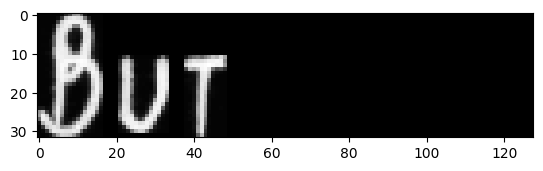

Cvu But
1/1 [==============================] - 0s 23ms/step


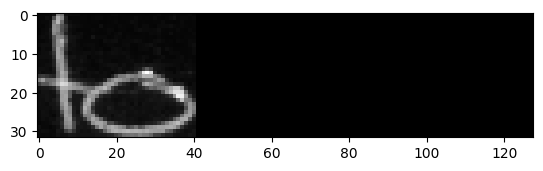

up to
1/1 [==============================] - 0s 23ms/step


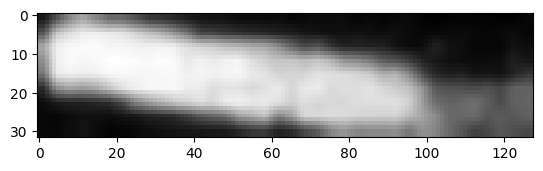

. -
1/1 [==============================] - 0s 23ms/step


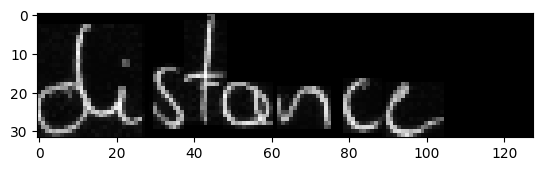

ejtubodf distance
1/1 [==============================] - 0s 24ms/step


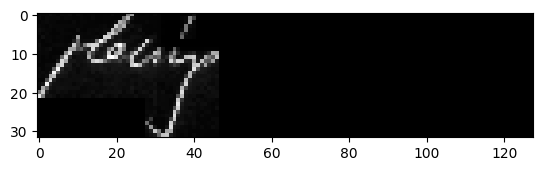

qpdjh placing
1/1 [==============================] - 0s 26ms/step


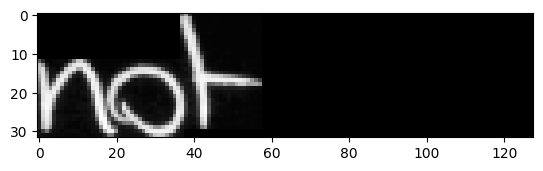

opu not
1/1 [==============================] - 0s 24ms/step


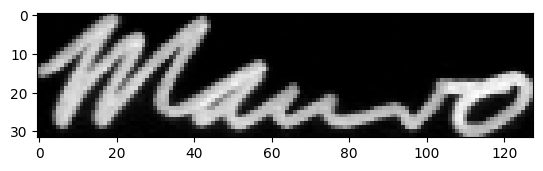

Nbvsp Mauro
1/1 [==============================] - 0s 22ms/step


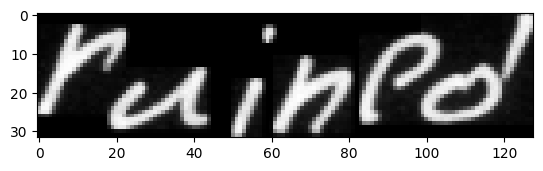

svjofe ruined
1/1 [==============================] - 0s 29ms/step


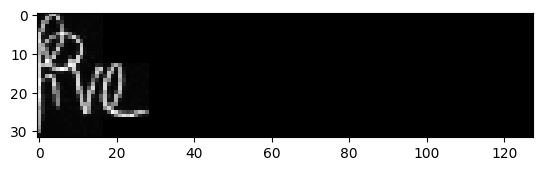

Qsf five
1/1 [==============================] - 0s 26ms/step


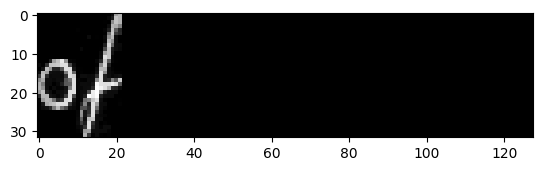

pg of


In [ ]:
for i in range(10):
    predicted_text, original_text = predict_image(i)
    plt.imshow(valid_images[i], cmap=plt.cm.gray)
    plt.show()
    print(predicted_text, original_text)

In [ ]:
predict_image(0)

1/1 [==============================] - 0s 25ms/step


('Cvu', 'But')

In [ ]:
pred = saved_model.predict(np.expand_dims(valid_images[0], axis=0))
out = K.get_value(K.ctc_decode(pred, input_length=np.ones(pred.shape[0]) * pred.shape[1], greedy=True)[0][0])
out

1/1 [==============================] - 0s 26ms/step


array([[28, 73, 72, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]])

In [ ]:
with open("character_encoding.json", "w") as json_file:
    json.dump(char_list, json_file)
json_file.close()